In [1]:
from gensim.models import word2vec
import csv
import os

tweets = []

with open('../tweets/ru/all_normalized.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        tweets.append(row[1:])

In [2]:
import itertools

president_country = [[u'россия', u'путин'], [u'америка', u'трамп'], [u'британия', u'мэй'],
                  [u'сирия', u'асад'], [u'германия', u'меркель'], [u'франция', u'макрон'],
                  [u'япония', u'абэ'], [u'турция', u'эрдоган']]

combinations_pres_country = [pair for pair in itertools.combinations(president_country, r=2)]

In [3]:
def evaluateModel(m, debug=0):
    find_country = 0
    find_president = 0
    for equation in combinations_pres_country:
        
        a = equation[0][0]
        b = equation[1][1]
        c = equation[0][1]
        d = equation[1][0]
        
        if a in m.wv.vocab and b in m.wv.vocab and c in m.wv.vocab:
            for i, x in enumerate(m.wv.most_similar(positive=[a, b], negative=[c])):
                if d == x[0]:
                    find_country += 1.0/(i + 1)
                    if debug == 1:
                        print("Found %s for relation %s -> %s and %s -> ? in position %d"%(d, c, a, b, i + 1))
        
        if c in m.wv.vocab and d in m.wv.vocab and b in m.wv.vocab:
            for i, x in enumerate(m.wv.most_similar(positive=[c, d], negative=[b])):
                if a == x[0]:
                    find_country += 1.0/(i + 1)
                    if debug == 1:
                        print("Found %s for relation %s -> %s and %s -> ? in position %d"%(a, b, d, c, i + 1))

        if a in m.wv.vocab and c in m.wv.vocab and d in m.wv.vocab:
            for i, x in enumerate(m.wv.most_similar(positive=[c, d], negative=[a])):
                if b == x[0]:
                    find_president += 1.0/(i + 1)
                    if debug == 1:
                        print("Found %s for relation %s -> %s and %s -> ? in position %d"%(b, a, c, d, i + 1))
        
        if a in m.wv.vocab and b in m.wv.vocab and d in m.wv.vocab:
            for i, x in enumerate(m.wv.most_similar(positive=[a, b], negative=[d])):
                if c == x[0]:
                    find_president += 1.0/(i + 1)
                    if debug == 1:
                        print("Found %s for relation %s -> %s and %s -> ? in position %d"%(c, d, b, a, i + 1))
                    
    return find_country, find_president
    

In [4]:
from sklearn.preprocessing import normalize

dimensions = [10, 50, 100, 200, 500, 1000]
window_sizes = [1, 2, 3, 5, 7]
min_count = [0, 25, 50, 75, 100]
sq = [0, 1]

scores = {}
model_count = 0

for dim in dimensions:
    for wind in window_sizes:
        for mc in min_count:
            for mode in sq:
                scores[(dim, wind, mc, mode)] = []
                for i in range(4):
                    model = word2vec.Word2Vec(sentences=tweets, size=dim, 
                                           window=wind, min_count=mc, sg=mode)
                    model.wv.syn0 = normalize(model.wv.syn0, axis=1, norm='l2')
                    #name='size=' + str(dim) + '_windowsize=' + str(wind) + '_mincount=' + str(mc) + '_alg=' + str(mode) 
                    #model.save('../models/ru/' + name)
                    sc, sp = evaluateModel(model)
                    
                    scores[(dim, wind, mc, mode)].append(sc + sp)
                print(model_count, ' ', end='')
                model_count += 1

/Users/nikita/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99  100  101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144  145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160  161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176  177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192  193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208  209  210  211  212  213  214  215  216  217  218  219  220  221  

In [5]:
scores

{(10, 1, 0, 0): [2.115079365079365,
  2.236111111111111,
  2.7111111111111112,
  1.7555555555555555],
 (10, 1, 0, 1): [17.487301587301587,
  20.59404761904762,
  18.660714285714285,
  16.715873015873015],
 (10, 1, 25, 0): [13.623412698412697,
  16.138492063492063,
  13.294047619047618,
  13.264285714285712],
 (10, 1, 25, 1): [9.793650793650793,
  13.885317460317463,
  15.322222222222221,
  15.287698412698413],
 (10, 1, 50, 0): [17.841269841269842,
  18.29365079365079,
  17.002380952380953,
  19.188492063492063],
 (10, 1, 50, 1): [19.831746031746032,
  25.754761904761907,
  22.26825396825397,
  21.792460317460318],
 (10, 1, 75, 0): [9.688492063492063,
  9.969047619047618,
  9.705555555555556,
  9.486904761904762],
 (10, 1, 75, 1): [14.698015873015875,
  13.485714285714284,
  18.39246031746032,
  15.121825396825397],
 (10, 1, 100, 0): [8.68888888888889,
  8.452380952380953,
  8.852777777777778,
  8.91468253968254],
 (10, 1, 100, 1): [8.101190476190478,
  7.917857142857143,
  8.2777777777

In [6]:
import numpy as np
import operator

avg_score = {}

for params, stats in scores.items():
    avg_score[params] = np.mean(np.array(stats))
    
sorted_avg = sorted(avg_score.items(), key = operator.itemgetter(1),reverse = True)
print (sorted_avg[:5])

[((10, 1, 50, 1), 22.41180555555556), ((200, 7, 50, 1), 21.600992063492065), ((100, 7, 50, 1), 18.81875), ((10, 1, 0, 1), 18.364484126984124), ((10, 1, 50, 0), 18.081448412698414)]


In [191]:
best_model_2 = word2vec.Word2Vec(sentences=tweets, size=10, 
                              window=1, min_count=50, sg=1)

best_model_2.wv.syn0 = normalize(best_model_2.wv.syn0, axis=1, norm='l2')

evaluateModel(best_model_2, 1)

Found британия for relation путин -> россия and мэй -> ? in position 6
Found путин for relation британия -> мэй and россия -> ? in position 2
Found сирия for relation путин -> россия and асад -> ? in position 1
Found россия for relation асад -> сирия and путин -> ? in position 1
Found асад for relation россия -> путин and сирия -> ? in position 1
Found путин for relation сирия -> асад and россия -> ? in position 1
Found франция for relation путин -> россия and макрон -> ? in position 10
Found макрон for relation россия -> путин and франция -> ? in position 1
Found путин for relation франция -> макрон and россия -> ? in position 7
Found абэ for relation россия -> путин and япония -> ? in position 2
Found турция for relation путин -> россия and эрдоган -> ? in position 5
Found эрдоган for relation россия -> путин and турция -> ? in position 6
Found путин for relation турция -> эрдоган and россия -> ? in position 9
Found британия for relation трамп -> америка and мэй -> ? in position 4
Fo

/Users/nikita/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  after removing the cwd from sys.path.


(8.177777777777777, 13.220238095238093)

In [222]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model, topics, cmap, clusters, threshold):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    happened = [False for i in range(len(clusters))]

    for word in model.wv.vocab:
        topic_num = -1
        for i, topic in enumerate(topics):
            if word in topic:
                topic_num = i
        if model.wv.vocab[word].count > threshold or topic_num != -1:
            tokens.append(model[word])
            labels.append(word)
    
    tsne_model = TSNE(perplexity=20, n_components=2, init='pca', n_iter=2500, random_state=561)
    new_values = tsne_model.fit_transform(tokens)
    
    #pca = PCA(n_components=2)
    #new_values = pca.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        
        topic_num = -1
        for j, topic in enumerate(topics):
            if labels[i] in topic:
                topic_num = j

        if topic_num == -1:
            plt.scatter(x[i],y[i], c='k', s = 25)
        else:
            plt.scatter(x[i],y[i], c=cmap[topic_num], s = 100, label = clusters[topic_num] if not happened[topic_num] else "")
            happened[topic_num] = True
            plt.annotate(labels[i],
                        xy=(x[i], y[i]),
                        xytext=(5, 2),
                        textcoords='offset points',
                        ha='right',
                        fontsize=10,
                        va='bottom')
    plt.legend()
    plt.show()
    
    return labels, new_values

In [223]:
important_words = [['путин', 'владимир', 'россия', 'рф', 'российский', 'кремль', 'олигарх', 'медведев'],
                   ['трамп', 'сша', 'дональд', 'трамп', 'штат', 'америка', 'американский', 'нато'],
                   ['ким', 'чен', 'ын', 'корея', 'северный', 'кндр', 'ядерный'],
                   ['мэй', 'тереза', 'макрон', 'франция', 'германия', 'меркель', 'ес', 'британия', 'великобритания'],
                   ['украина', 'крым', 'киев', 'донбасс', 'порошенко'],
                   ['армения', 'саргсян', 'протест', 'улица', 'ереван', 'революция', 'акция'],
                   ['деньги', 'рубль', 'доллар', 'экономика', 'бизнес', 'рынок', 'финансовый', 'деньги', 'коррупция', 'банк',
                   'финансы', 'нефть', 'товар', 'валюта'],
                   ['солсбери', 'скрипаль', 'новичок', 'отравление', 'яд', 'агент', 'отравление', 'вещество'],
                   ['дуров', 'телеграмма', 'блокировка', 'ркн', 'роскомнадзор', 'блокировать', 'попытка', 'интернет'],
                   ['асад', 'башар', 'атака', 'химатака', 'оружие', 'ракета', 'взрыв', 'жертва',
                   'налет', 'погибать', 'ввс', 'хомс', 'дума', 'обстреливать', 'цель', 'химоружие', 'ракетный', 'бомба'],
                  ['сильный', 'сильно', 'хороший', 'великий', 'победа', 'друг', 'умный', 'правда', 'помогать', 'защищать'],
                  ['слабый', 'слабо', 'плохой', 'позорный', 'разрушать', 'враг', 'глупый', 'ложь', 'врать', 'атаковать', 'чужой',
                  'агрессор', 'нападение', 'пропаганда']]


import pylab
NUM_COLORS = 12

desc = ['Russia', 'USA', 'North Korea', 'EU (UK, France, Germany)', 'Ukraine', 'Armenia', 'economic',
       'Skripal case', 'blocking Telegram', 'Syria', 'positive words', 'negative words']
cm = pylab.get_cmap('gist_rainbow')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
colors[9] = (0.8, 0.7, 0.2, 1.0)
colors[1] = (1.0, 0.55, 0.0, 1.0)

/Users/nikita/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


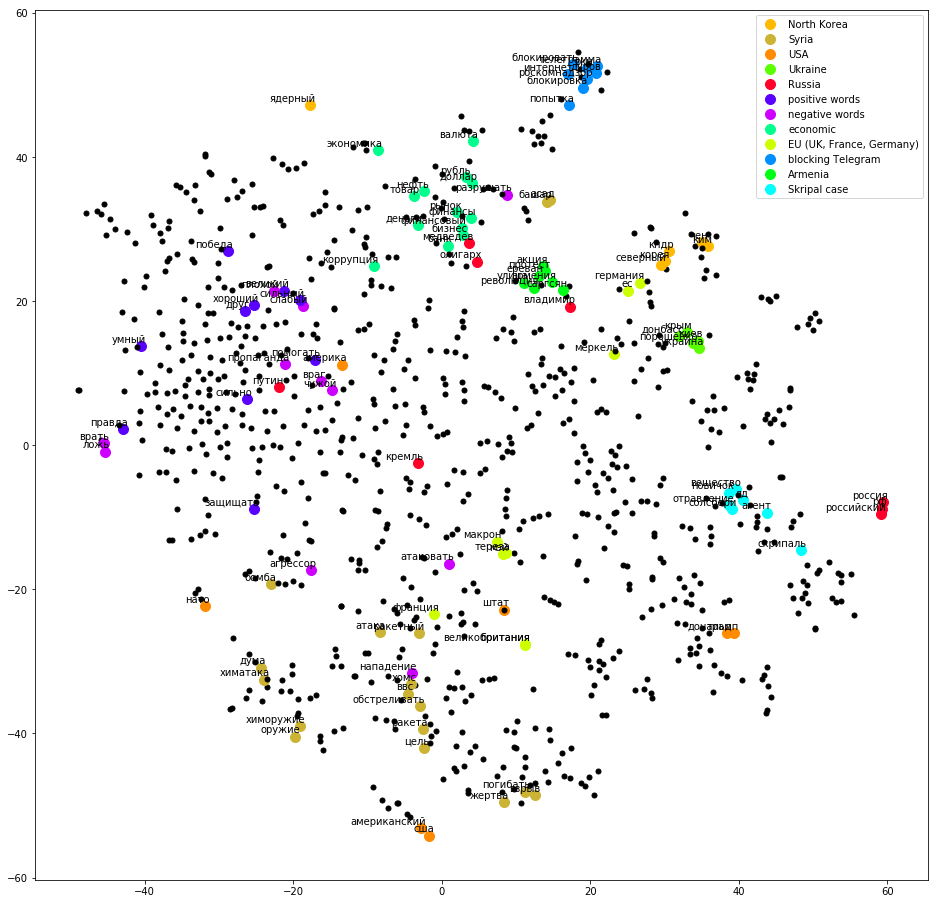

In [227]:
qqq, www = tsne_plot(best_model, important_words, colors, desc, 80)

In [179]:
best_model.save('../models/ru/zaebataya')

In [225]:
best_model_2.save('../models/ru/ne_takaya_zaebataya_no_ok')

In [229]:
evaluateModel(best_model_2, 1)

Found британия for relation путин -> россия and мэй -> ? in position 6
Found путин for relation британия -> мэй and россия -> ? in position 2
Found сирия for relation путин -> россия and асад -> ? in position 1
Found россия for relation асад -> сирия and путин -> ? in position 1
Found асад for relation россия -> путин and сирия -> ? in position 1
Found путин for relation сирия -> асад and россия -> ? in position 1
Found франция for relation путин -> россия and макрон -> ? in position 10
Found макрон for relation россия -> путин and франция -> ? in position 1
Found путин for relation франция -> макрон and россия -> ? in position 7
Found абэ for relation россия -> путин and япония -> ? in position 2
Found турция for relation путин -> россия and эрдоган -> ? in position 5
Found эрдоган for relation россия -> путин and турция -> ? in position 6
Found путин for relation турция -> эрдоган and россия -> ? in position 9
Found британия for relation трамп -> америка and мэй -> ? in position 4
Fo

(8.177777777777777, 13.220238095238093)

In [230]:
evaluateModel(best_model, 1)

Found мэй for relation россия -> путин and британия -> ? in position 3
Found меркель for relation россия -> путин and германия -> ? in position 2
Found япония for relation путин -> россия and абэ -> ? in position 7
Found абэ for relation россия -> путин and япония -> ? in position 2
Found турция for relation путин -> россия and эрдоган -> ? in position 1
Found эрдоган for relation россия -> путин and турция -> ? in position 1
Found америка for relation мэй -> британия and трамп -> ? in position 10
Found германия for relation трамп -> америка and меркель -> ? in position 2
Found америка for relation меркель -> германия and трамп -> ? in position 1
Found меркель for relation америка -> трамп and германия -> ? in position 4
Found япония for relation трамп -> америка and абэ -> ? in position 3
Found америка for relation абэ -> япония and трамп -> ? in position 2
Found абэ for relation америка -> трамп and япония -> ? in position 1
Found америка for relation эрдоган -> турция and трамп -> ?

(8.038492063492065, 11.017857142857142)